In [ ]:
-veri setinde bağımlı değişken yoksa gözetimsiz öğrenme olur
-gözetimsiz öğrenme çeşitleri ;
-1:K-Ortalamalar Yöntemi
-2:Hiyerarşik Kümeleme Analizi
-3:Temel Bileşen Analizi

K-Ortalamalar (K-Means)

In [ ]:
-gözlem birimlerini birbirlerine benzerliklerine göre kümelere ayırma
-küme sayısı belirlenir
-rastgele k merkez seçilir
-her gözlem için k merkezlere uzaklıklar hesaplanır
-her gözlem en yakın olduğu kümeye atanır
-atama işlemlerinden sonra oluşan kümeler için tekrar merkez hesaplamaları yapılır
-belirli bir iterasyonca tekrar edilir ve küme içi hata kareler toplamlarının minimum olduğu durumdaki gözlemlerin kümelenme yapısı nihai kümelenme olarak seçilir

In [1]:
!pip install yellowbrick

In [2]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder

In [4]:
df = pd.read_csv("/content/USArrests.csv", index_col=0)

In [13]:
def load():
  df = pd.read_csv("USArrests.csv", index_col=0)
  return df
df = load()
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [5]:
df.head()
df.isnull().sum()
df.info()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


from matplotlib import pyplot as plt
_df_0['mean'].plot(kind='hist', bins=20, title='mean')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['std'].plot(kind='hist', bins=20, title='std')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['min'].plot(kind='hist', bins=20, title='min')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['25%'].plot(kind='hist', bins=20, title='25%')
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/core.py:1345: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  scatter = ax.scatter(


from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='mean', y='std', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/core.py:1345: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  scatter = ax.scatter(


from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='std', y='min', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/core.py:1345: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  scatter = ax.scatter(


from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='min', y='25%', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/core.py:1345: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  scatter = ax.scatter(


from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='25%', y='50%', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['count']
  ys = series['mean']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('count', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('count')
_ = plt.ylabel('mean')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['count']
  ys = series['std']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('count', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('count')
_ = plt.ylabel('std')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['count']
  ys = series['min']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('count', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('count')
_ = plt.ylabel('min')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['count']
  ys = series['25%']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('count', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('count')
_ = plt.ylabel('25%')

from matplotlib import pyplot as plt
_df_12['mean'].plot(kind='line', figsize=(8, 4), title='mean')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['std'].plot(kind='line', figsize=(8, 4), title='std')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['min'].plot(kind='line', figsize=(8, 4), title='min')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['25%'].plot(kind='line', figsize=(8, 4), title='25%')
plt.gca().spines[['top', 'right']].set_visible(False)

In [6]:
sc = MinMaxScaler((0, 1))
df = sc.fit_transform(df)
df[0:5]

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512]])

In [7]:
kmeans = KMeans(n_clusters=4, random_state=17).fit(df)
kmeans.get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 4,
 'n_init': 'auto',
 'random_state': 17,
 'tol': 0.0001,
 'verbose': 0}

In [9]:
kmeans.n_clusters

4

In [10]:
kmeans.cluster_centers_

array([[0.1686747 , 0.11485774, 0.34028683, 0.12601868],
       [0.6124498 , 0.75      , 0.75423729, 0.67980189],
       [0.30439405, 0.32937147, 0.70588235, 0.31098951],
       [0.79141566, 0.6802226 , 0.36864407, 0.36466408]])

In [11]:
kmeans.labels_

array([3, 1, 1, 3, 1, 1, 2, 2, 1, 3, 2, 0, 1, 2, 0, 2, 0, 3, 0, 1, 2, 1,
       0, 3, 2, 0, 0, 1, 0, 2, 1, 1, 3, 0, 2, 2, 2, 2, 2, 3, 0, 3, 1, 2,
       0, 2, 2, 0, 0, 2], dtype=int32)

In [12]:
kmeans.inertia_

3.683456153585914

 Optimum Küme Sayısının Belirlenmesi

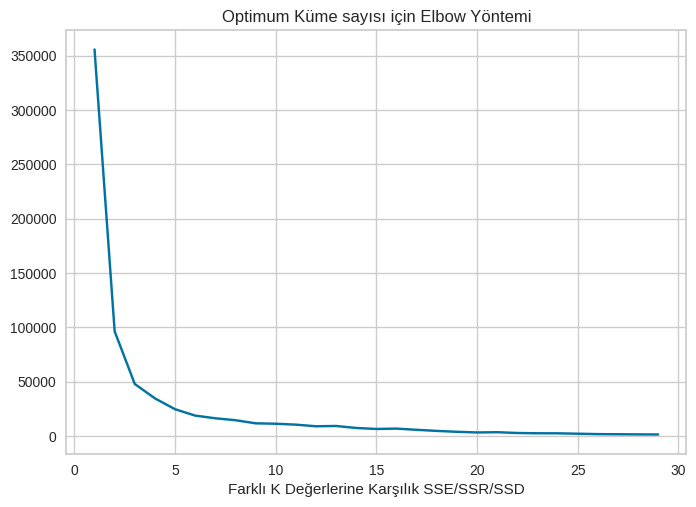

In [14]:
kmeans = KMeans()
ssd = []
K = range(1, 30)

for k in K:
    kmeans = KMeans(n_clusters=k).fit(df)
    ssd.append(kmeans.inertia_)

plt.plot(K, ssd, "bx-")
plt.xlabel("Farklı K Değerlerine Karşılık SSE/SSR/SSD")
plt.title("Optimum Küme sayısı için Elbow Yöntemi")
plt.show()

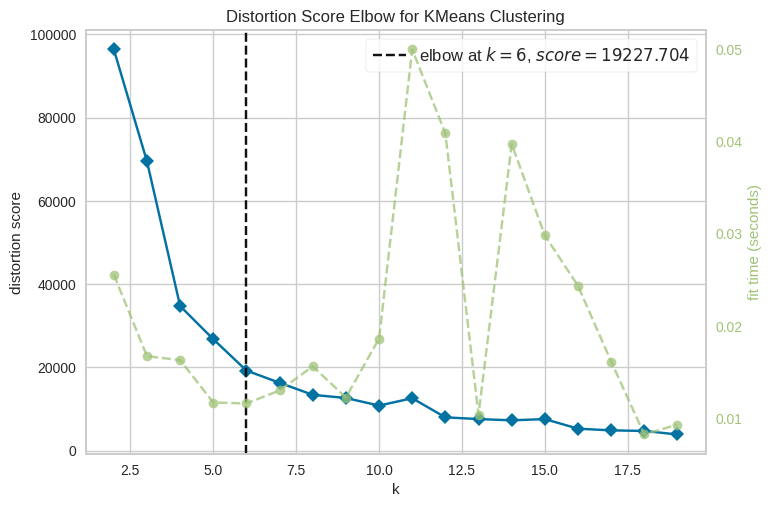

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [15]:
kmeans = KMeans()
elbow = KElbowVisualizer(kmeans, k=(2, 20))
elbow.fit(df)
elbow.show()

In [16]:
elbow.elbow_value_

6

Final Cluster'ların Oluşturulması

In [17]:
kmeans = KMeans(n_clusters=elbow.elbow_value_).fit(df)

In [20]:
kmeans.n_clusters
kmeans.cluster_centers_
kmeans.labels_
df[0:5]

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [27]:
df = load()
kmeans_cluster = kmeans.labels_
df["km_cluster"] = kmeans_cluster
df["km_cluster"] = df["km_cluster"] + 1
df.head()

,Murder,Assault,UrbanPop,Rape,cluster,km_cluster
Alabama,13.2,236,58,21.2,6,6
Alaska,10.0,263,48,44.5,2,2
Arizona,8.1,294,80,31.0,5,5
Arkansas,8.8,190,50,19.5,4,4
California,9.0,276,91,40.6,6,6


In [22]:
clusters_kmeans = kmeans.labels_

In [25]:
df.groupby("cluster").agg(["mean", "count"])

Murder           Assault         UrbanPop             Rape      
           mean count        mean count       mean count       mean count
cluster                                                                  
1         5.590    10  112.400000    10  65.600000    10  17.270000    10
2        13.500     3  267.000000     3  46.666667     3  28.033333     3
3         2.950    10   62.700000    10  53.900000    10  11.510000    10
4         7.475    12  167.583333    12  70.916667    12  21.275000    12
5        11.840     5  310.200000     5  68.400000     5  27.780000     5
6        11.460    10  242.400000    10  74.900000    10  29.550000    10

In [26]:
df.to_csv("cluster.csv", index=False)

Hierarchical Clustering

In [ ]:
-gözlemler birleşe birleşe daha fazla gözlemle daha az küme oluşturur
-dendrogram ile gösterilir

In [31]:
df = load()
sc = MinMaxScaler((0, 1))
df = sc.fit_transform(df)

In [29]:
df = pd.read_csv("/content/USArrests.csv", index_col=0)

In [30]:
sc = MinMaxScaler((0, 1))
df = sc.fit_transform(df)

In [32]:
hc_average = linkage(df, "average")

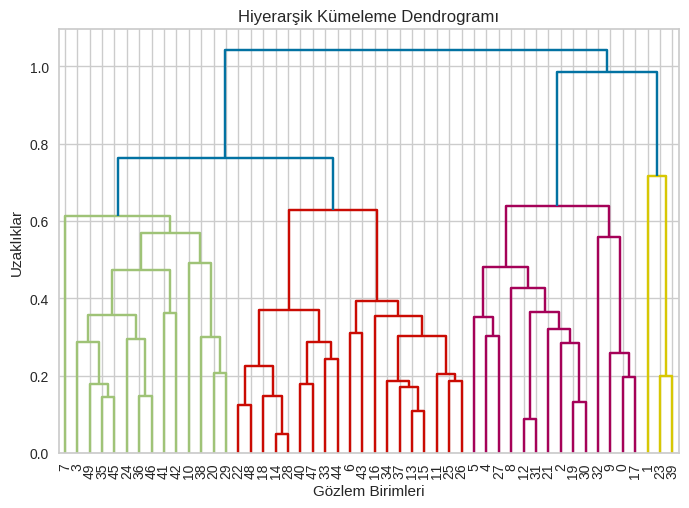

In [33]:
plt.title("Hiyerarşik Kümeleme Dendrogramı")
plt.xlabel("Gözlem Birimleri")
plt.ylabel("Uzaklıklar")
dendrogram(hc_average,
           leaf_font_size=10)
plt.show()

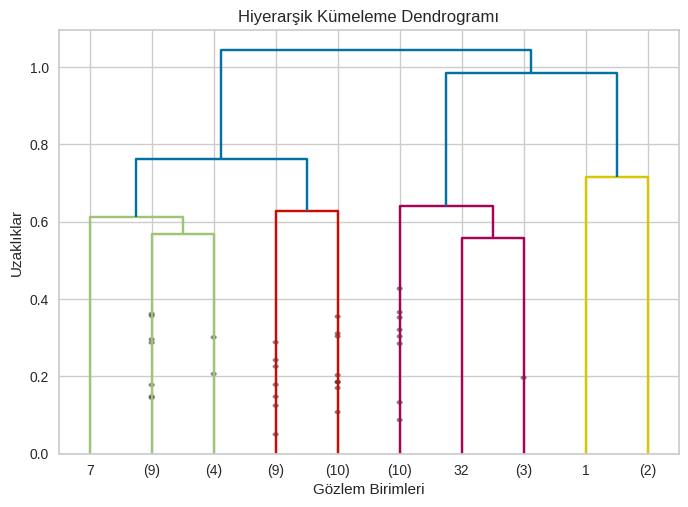

In [34]:
plt.title("Hiyerarşik Kümeleme Dendrogramı")
plt.xlabel("Gözlem Birimleri")
plt.ylabel("Uzaklıklar")
dendrogram(hc_average,
           truncate_mode="lastp",
           p=10,
           show_contracted=True,
           leaf_font_size=10)
plt.show()

Kume Sayısını Belirlemek

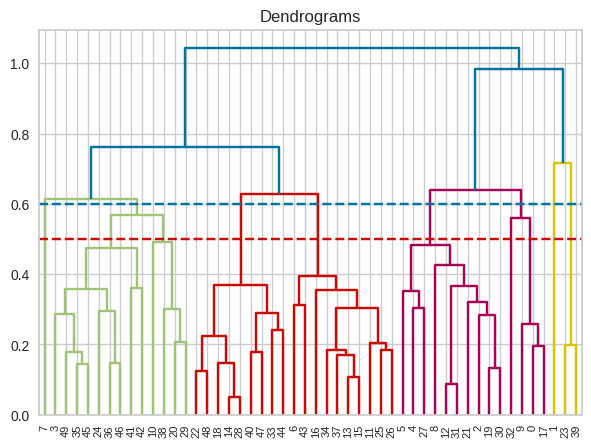

In [35]:
plt.figure(figsize=(7, 5))
plt.title("Dendrograms")
dend = dendrogram(hc_average)
plt.axhline(y=0.5, color='r', linestyle='--')
plt.axhline(y=0.6, color='b', linestyle='--')
plt.show()

Final Modeli Oluşturmak

In [36]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, linkage="average")
clusters = cluster.fit_predict(df)

In [37]:
df = load()

In [38]:
df["hi_cluster"] = clusters
df["hi_cluster"] = df["hi_cluster"] + 1
df.head()

,Murder,Assault,UrbanPop,Rape,cluster,hi_cluster
Alabama,13.2,236,58,21.2,6,1
Alaska,10.0,263,48,44.5,2,5
Arizona,8.1,294,80,31.0,5,1
Arkansas,8.8,190,50,19.5,4,4
California,9.0,276,91,40.6,6,1


Temel Bileşen Analizi

In [41]:
df = pd.read_csv("/content/hitters.csv")
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [47]:
df = StandardScaler().fit_transform(df)
pca = PCA()
pca_fit = pca.fit_transform(df)

In [48]:
pca.explained_variance_ratio_
np.cumsum(pca.explained_variance_ratio_)

array([0.46037855, 0.72077704, 0.82416565, 0.87785586, 0.91993427,
       0.94957018, 0.96527809, 0.9766709 , 0.9845032 , 0.9903799 ,
       0.99412755, 0.99722139, 0.99877819, 0.99963722, 0.99992409,
       1.        ])

In [ ]:
-üstte sırayla kaç bileşen verinin % kaçını açıklayabiliyor onu görüyoruz
-ilk bileşen tek başına %46 2. bileşen gelince toplam %72 ye çıkıyor

Optimum Bileşen Sayısı

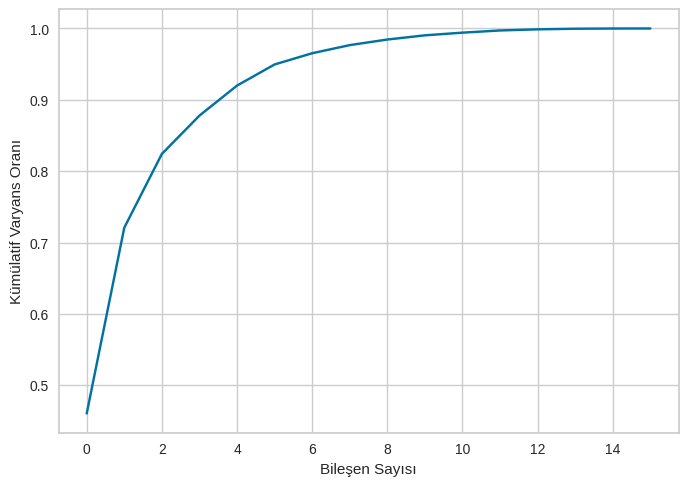

In [49]:
pca = PCA().fit(df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Bileşen Sayısı")
plt.ylabel("Kümülatif Varyans Oranı")
plt.show()

Final PCA'in Oluşturulması

In [50]:
pca = PCA(n_components=3)
pca_fit = pca.fit_transform(df)

pca.explained_variance_ratio_
np.cumsum(pca.explained_variance_ratio_)

array([0.46037855, 0.72077704, 0.82416565])

In [ ]:
-bunlarda tek başlarına açıkladıkları oranlar

Temel Bileşen Regresyon Modeli

In [53]:
df = pd.read_csv("/content/hitters.csv")
df.shape

(322, 20)

In [59]:
len(pca_fit)

322

In [60]:
num_cols = [col for col in df.columns if df[col].dtypes != "O" and "Salary" not in col]
len(num_cols)

16

In [61]:
others = [col for col in df.columns if col not in num_cols]

In [62]:
pd.DataFrame(pca_fit, columns=["PC1","PC2","PC3"]).head()

df[others].head()

,League,Division,Salary,NewLeague
0,A,E,NaN,A
1,N,W,475.0,N
2,A,W,480.0,A
3,N,E,500.0,N
4,N,E,91.5,N


In [63]:

final_df = pd.concat([pd.DataFrame(pca_fit, columns=["PC1","PC2","PC3"]),
                      df[others]], axis=1)
final_df.head()

,PC1,PC2,PC3,League,Division,Salary,NewLeague
0,-3.240106,0.253173,0.776066,A,E,NaN,A
1,0.245488,-1.302951,0.118040,N,W,475.0,N
2,0.603883,2.617002,-0.698183,A,W,480.0,A
3,3.591276,-0.547821,-1.049022,N,E,500.0,N
4,-2.264528,0.698898,-1.290536,N,E,91.5,N


In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [65]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

In [66]:
for col in ["NewLeague", "Division", "League"]:
    label_encoder(final_df, col)

final_df.dropna(inplace=True)

In [67]:
y = final_df["Salary"]
X = final_df.drop(["Salary"], axis=1)

In [71]:
lm = LinearRegression()
rmse = np.mean(np.sqrt(-cross_val_score(lm, X, y, cv=5, scoring="neg_mean_squared_error")))
rmse

345.6021106351967

In [70]:
cart = DecisionTreeRegressor()
rmse = np.mean(np.sqrt(-cross_val_score(cart, X, y, cv=5, scoring="neg_mean_squared_error")))
rmse

375.60238087971317

In [72]:
from sklearn.model_selection import GridSearchCV

In [73]:
cart_params = {"max_depth": range(1,10),
              "min_samples_split": range(2,10)}

cart_best_grid = GridSearchCV(cart, cart_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


In [74]:
cart_final = DecisionTreeRegressor(**cart_best_grid.best_params_, random_state=17).fit(X, y)

In [75]:
rmse = np.mean(np.sqrt(-cross_val_score(cart_final, X, y, cv=5, scoring="neg_mean_squared_error")))
rmse

331.2894919668362

In [ ]:
-label olmayan veri setinde nasıl sınıflandırma yapılır
-eldeki verileri kümeleriz sonraki değerler için bu kümeler aslında sınıflar olur

PCA ile Çok Boyutlu Veriyi 2 Boyutta Görselleştirme

In [ ]:
# Breast Cancer

In [79]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

In [80]:
df = pd.read_csv("/content/breast_cancer.csv")

In [78]:
y = df["diagnosis"]
X = df.drop(["diagnosis", "id"], axis=1)

In [85]:
def create_pca_df(X, y):
  X = StandardScaler().fit_transform(X)
  pca = PCA(n_components=2)
  pca_fit = pca.fit_transform(X)
  pca_df = pd.DataFrame(data=pca_fit, columns=["PC1", "PC2"])
  final_df = pd.concat([pca_df, pd.DataFrame(y)], axis=1)
  return final_df

In [86]:
pca_df = create_pca_df(X, y)
pca_df.head()

,PC1,PC2,diagnosis
0,9.192837,1.948583,M
1,2.387802,-3.768172,M
2,5.733896,-1.075174,M
3,7.122953,10.275589,M
4,3.935302,-1.948072,M


In [87]:
import random

In [88]:
def plot_pca(dataframe, target):
  fig = plt.figure(figsize=(7,5))
  ax = fig.add_subplot(1,1,1)
  ax.set_xlabel("PC1", fontsize=15)
  ax.set_ylabel("PC2", fontsize=15)
  ax.set_title(f'{target.capitalize()}', fontsize=20)

  targets = list(dataframe[target].unique())
  len(targets)
  colors = random.sample(['r', 'b', 'g', 'y'], len(targets))

  for t, color in zip(targets, colors):
    indices = dataframe[target] == t
    ax.scatter(dataframe.loc[indices, "PC1"],
               dataframe.loc[indices, "PC2"],
               c=color,
               s=50)
  ax.legend(targets)
  ax.grid()
  plt.show()

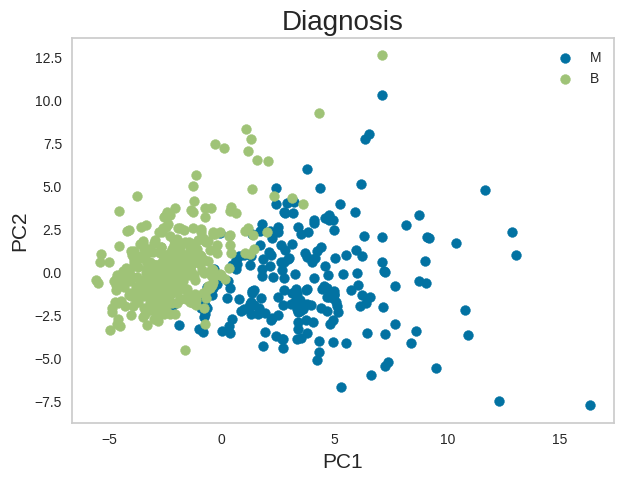

In [89]:
plot_pca(pca_df, "diagnosis")

In [ ]:
# Iris

In [90]:
import seaborn as sns

In [91]:
df = sns.load_dataset("iris")
y = df["species"]
X = df.drop(["species"], axis=1)

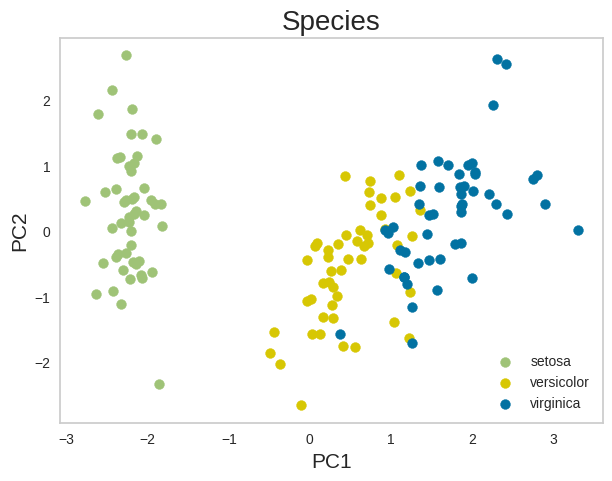

In [92]:
pca_df = create_pca_df(X, y)
plot_pca(pca_df, "species")

In [ ]:
# Diabetes

In [94]:
df = pd.read_csv("/content/diabetes.csv")

In [95]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

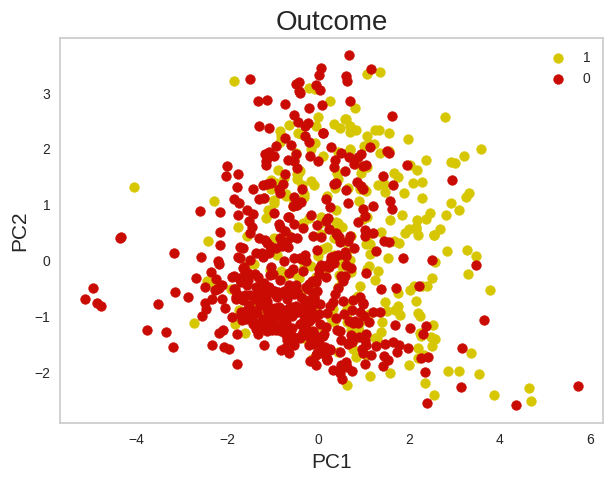

In [96]:
pca_df = create_pca_df(X, y)
plot_pca(pca_df, "Outcome")